# Run k=5 anf k=6 analysis to see whether thhere are any missing similarities betweeen peptides in PAA inventory file

In [1]:
#Import packages
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as ss
import csv

In [2]:
# Import excel file containing all natural sequences from the lab with a single name
path_seq = 'Inputs/PAA/Peptide_Inventory_only_peptides.xlsx'

# Make dataframe with all peptides
data = pd.read_excel(path_seq, header=0, index_col=0)

data

,LUAD panel,In-house name,LCS panel,BV panel,TQ panel,Sequence,Composition
PAA,,,,,,,
S1,NaN,NaN,LQ1,NaN,NaN,GRQRRVVGG,Natural
S2,NaN,NaN,LQ2,NaN,NaN,GRQARAVGG,Natural
S3,NaN,NaN,LQ3,NaN,NaN,GRRARVVGG,Natural
S4,PP04,Q6,LQ4,NaN,TQ6,GPLGLRSWG,Natural
S5,NaN,NaN,LQ5,NaN,NaN,GWEAVRSAMWG,Natural
...,...,...,...,...,...,...,...
S149,NaN,BV13,NaN,NaN,NaN,GGPRAAA[Phe(homo)]TSPG,Non-natural
S150,NaN,BV14,NaN,NaN,NaN,GGTGPPGYTG,Natural
S151,NaN,BV15,NaN,NaN,NaN,GGTGLPVYQG,Natural


In [3]:
# Function to generate kmers of different sizes
def generate_kmers(keys_list, values_list, k):
    kmer_dict = {}  #create empy dictionary, keys will be the name of the peptide and the values will be the kmers
    for i in np.arange(len(keys_list)):
        temp_seq = values_list[i]
        #print(temp_seq)
        #print(len(temp_seq))
        n=len(temp_seq)-k+1
        #print(n)
        temp_kmer = []
        for j in np.arange(n): temp_kmer.append(temp_seq[j:j+k])
        kmer_dict[keys_list[i]] = temp_kmer
        
    return kmer_dict

In [4]:
# define keys and values to run genrate_kmer function with bhatia peptides
keys = data.index.to_list()
values = data['Sequence'].to_list()


kmer_5=generate_kmers(keys, values, k=5)
kmer_6=generate_kmers(keys, values, k=6)
kmer_7=generate_kmers(keys, values, k=7)

#print('Str1:', values[0])
#print('Str2:', values[1])
#print(kmer_5)

In [5]:
# function to find overlapping kmers
def find_overlap(kmer_dict):
    # find unique kmers in dictionary
    unique = list(sorted({ele for val in kmer_dict.values() for ele in val}))
    print('Number of unique kmers is:', len(unique))
    
    # create new dictionary that will store peptides with overlapping kmers
    overlap_dict = {}  
    overlap_keys = unique
    for i in overlap_keys:
        overlap_dict[i] = []
        
    for el in unique:
        for key in kmer_dict.keys(): 
            #print('key:', key)
            if el in kmer_dict[key]:
                #print('kmer_4[key]:', kmer_3[key])
                #print(el+' in '+ key)
                overlap_dict[el].append(key)
            #else:
             #   print('no overlap')
            #print(overlap_dict)
    
    return overlap_dict

In [8]:
# find overlap of kmers of different lengths between bhatia lab and revitope

overlap = find_overlap(kmer_7)
print(overlap)

with open('outputs/PAA/kmer_7_paa.csv', 'w') as f:
    for key in overlap.keys():
        f.write("%s,%s\n"%(key,overlap[key]))
        

Number of unique kmers is: 696
{'(Me)]HA': ['S79'], '(O)2][O': ['S152'], '(O-Bzl)': ['S152'], '(OMeBzl': ['S118'], '(homo)]': ['S111', 'S131', 'S132', 'S149'], ')2][Oic': ['S152'], ')]FLYTA': ['S132'], ')]TLYTA': ['S131'], ')][Met(': ['S152'], '-Bzl)][': ['S152'], '2][Oic]': ['S152'], 'AAATQKK': ['S90'], 'AAA[Phe': ['S149'], 'AAEAISD': ['S81'], 'AALITRP': ['S43'], 'AALIVRP': ['S37'], 'AANLTRG': ['S109'], 'AAN[C(O': ['S118'], 'AA[Phe(': ['S149'], 'AEAISDA': ['S81'], 'AEQQRLG': ['S68'], 'AEQQRLK': ['S67'], 'AFRRSGG': ['S108'], 'AGGAQMG': ['S52'], 'AGPRKAA': ['S31'], 'AIEFDSG': ['S70'], 'AKIRGQA': ['S33'], 'AKIRKAK': ['S32'], 'ALAVERT': ['S125'], 'ALEESQG': ['S123'], 'ALITRPD': ['S43'], 'ALIVRPD': ['S37'], 'ALKQTIG': ['S147'], 'ALLRVKR': ['S63'], 'ALVPRGS': ['S12'], 'ALWESQG': ['S24'], 'ALWRSQG': ['S124'], 'AN[C(OM': ['S118'], 'APFEFSA': ['S120'], 'APFEMSA': ['S29', 'S78'], 'AQAFRSG': ['S23'], 'AQAVRSS': ['S55', 'S112'], 'AQA[Phe': ['S111'], 'AQPDALN': ['S82'], 'AQTLTLR': ['S56'], 'ARALKQ

In [9]:
def similarity(str1, str2):
    from fuzzywuzzy import fuzz
    # Calculate Levenshtein distance (Ratio) as well as a modified Levenshtein distance that ignores differences in length
    ratio = fuzz.ratio(str1.lower(),str2.lower())
    partial_ratio = fuzz.partial_ratio(str1.lower(),str2.lower())
    
    return ratio, partial_ratio

Str1 = data['Sequence'][0]+'G'
Str2 = data['Sequence'][1]

[rat, par_rat] = similarity(Str1, Str2)
print(rat)
print(par_rat)

74
78


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
def similarity_matrix(mat):
    rows = mat.index.to_list()
    cols = mat.index.to_list()
    sim_m = pd.DataFrame(index=rows, columns=cols)
    sim_par_m = pd.DataFrame(index=rows, columns=cols)

    j=0
    for j in np.arange(len(rows)):
        for i in np.arange(len(rows)):
            Str1 = mat['Sequence'].loc[rows[j]]
            Str2 = mat['Sequence'].loc[rows[i]]
            sim_m.iloc[j,i] = similarity(Str1, Str2)[0]
            sim_par_m.iloc[j,i] = similarity(Str1, Str2)[1]
            
        j=j+1
        
    return sim_m, sim_par_m

In [11]:
# Calculate pairwise similarity between strings using the simple levenshtein distance and the partial levenshtein distance
mat, par_mat = similarity_matrix(data)
display(mat)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S144,S145,S146,S147,S148,S149,S150,S151,S152,S153
S1,100,78,89,33,30,40,47,38,20,40,...,21,20,19,18,18,13,21,21,10,25
S2,78,100,78,33,40,50,47,38,30,40,...,21,20,19,45,18,26,21,21,10,25
S3,89,78,100,33,40,50,47,38,30,40,...,21,20,19,36,18,26,21,21,10,25
S4,33,33,33,100,50,40,71,88,30,30,...,42,30,38,27,27,19,42,42,14,38
S5,30,40,40,50,100,45,32,33,27,36,...,19,18,26,42,25,24,19,29,14,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S149,13,13,13,32,12,36,27,28,12,24,...,19,36,29,34,29,100,31,25,36,41
S150,21,21,21,42,19,38,44,47,19,29,...,50,38,36,35,26,31,100,60,14,35
S151,21,21,21,42,19,38,33,47,19,29,...,60,38,45,35,26,25,70,100,14,35
S152,10,10,10,14,9,18,10,15,9,18,...,19,32,13,30,17,33,14,14,100,15


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


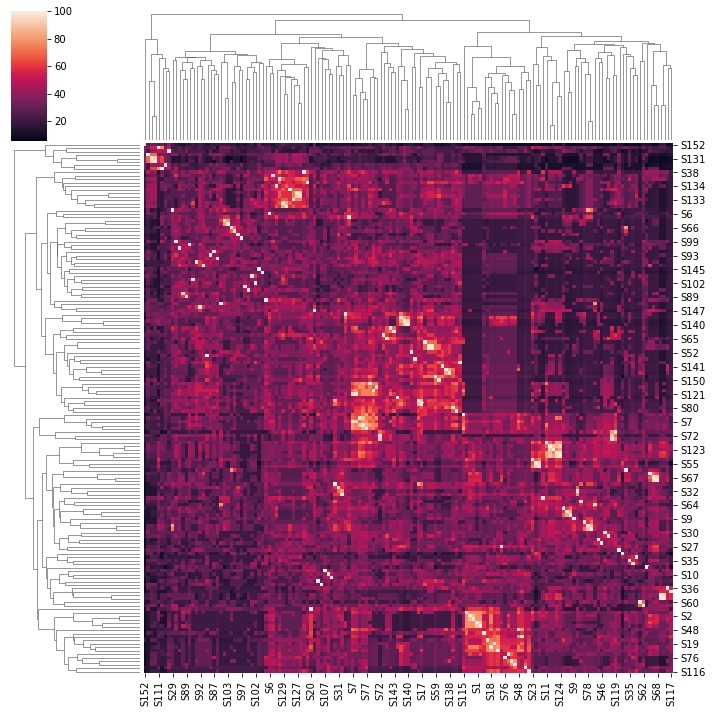

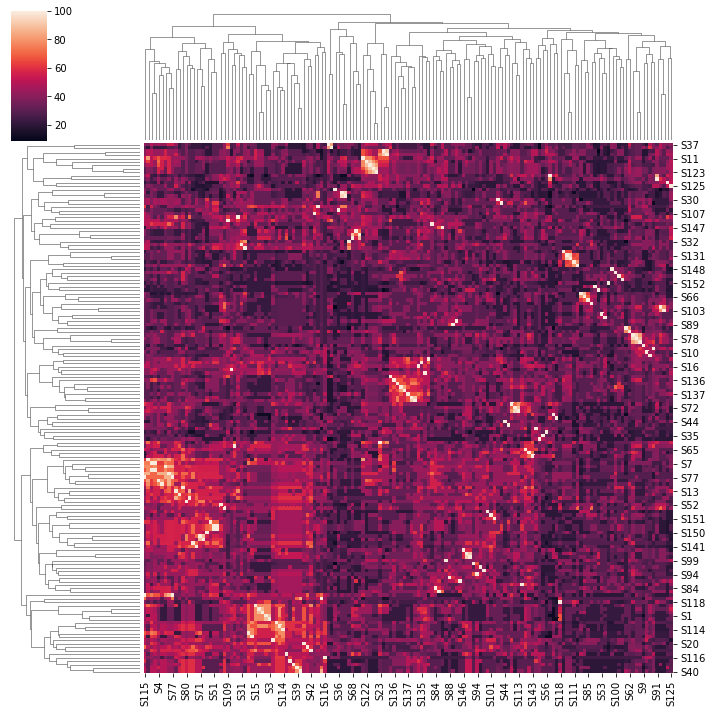

In [12]:
# Plot clustermap of similarity scores
mat = mat.astype(float)
par_mat = par_mat.astype(float)

cluster_grid_mat = sns.clustermap(mat)

cluster_grid_par_mat = sns.clustermap(par_mat)

Text(0, 0.5, 'Frequency')

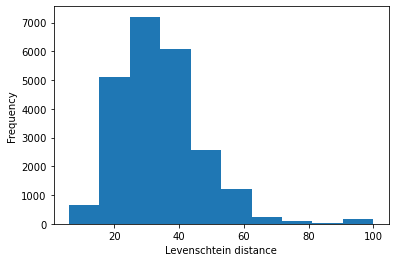

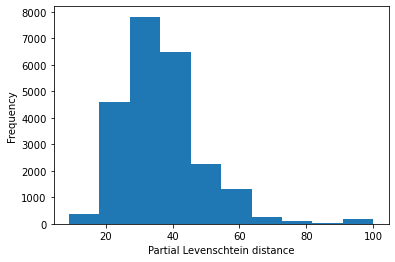

In [17]:
# Make histogram of similairyt scores
sim = np.concatenate(mat.values)
par_sim = np.concatenate(par_mat.values)

fig = plt.figure()
plt.hist(sim)
plt.xlabel('Levenschtein distance')
plt.ylabel('Frequency')


fig = plt.figure()
plt.hist(par_sim)
plt.xlabel('Partial Levenschtein distance')
plt.ylabel('Frequency')

In [20]:
# Make similarity 
num_row = len(par_mat.index)
print(len(par_mat.index))

num_col = len(par_mat.columns)
print(len(par_mat.columns))

pair_sim = pd.DataFrame(columns = ['Peptide 1', 'Sequence 1', 'Peptide 2', 'Sequence 2' ,'Similarity'], index=np.arange(num_row*num_col))

display(pair_sim)
n=0
for i in np.arange(num_row):
    for j in np.arange(num_col):
        pep1=par_mat.index[i]
        pair_sim.iloc[n,0] = pep1
        pair_sim.iloc[n,1] = data['Sequence'].loc[pep1]
        pep2=par_mat.columns[j]
        pair_sim.iloc[n,2]=pep2
        pair_sim.iloc[n,3] = data['Sequence'].loc[pep2]
        pair_sim.iloc[n,4] = par_mat.iloc[i,j]
        n=n+1

display(pair_sim)       
        
    

153
153


,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
23404,NaN,NaN,NaN,NaN,NaN
23405,NaN,NaN,NaN,NaN,NaN
23406,NaN,NaN,NaN,NaN,NaN
23407,NaN,NaN,NaN,NaN,NaN


,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity
0,S1,GRQRRVVGG,S1,GRQRRVVGG,100
1,S1,GRQRRVVGG,S2,GRQARAVGG,78
2,S1,GRQRRVVGG,S3,GRRARVVGG,89
3,S1,GRQRRVVGG,S4,GPLGLRSWG,35
4,S1,GRQRRVVGG,S5,GWEAVRSAMWG,22
...,...,...,...,...,...
23404,S153,GGAAFAG,S149,GGPRAAA[Phe(homo)]TSPG,71
23405,S153,GGAAFAG,S150,GGTGPPGYTG,43
23406,S153,GGAAFAG,S151,GGTGLPVYQG,43
23407,S153,GGAAFAG,S152,GG[Nle(O-Bzl)][Met(O)2][Oic][Abu],29


In [23]:
# make new columns with combined name, remove duplicates and sort by similarity
pair_sim['Peptide pair']=pair_sim['Peptide 1']+'-'+pair_sim['Peptide 2']
# pair_sim2=pair_sim.drop_duplicates(subset=['Peptide pair'])
pair_sim_sorted = pair_sim.sort_values(by=['Similarity'], ascending=False)
pair_sim_sorted.to_csv('outputs/PAA/sorted_pairwise_partial_levenschtein_distance_paa_bhatia.csv')

pair_sim_sorted  

,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity,Peptide pair
0,S1,GRQRRVVGG,S1,GRQRRVVGG,100,S1-S1
7700,S51,GGLGPKGQTG,S51,GGLGPKGQTG,100,S51-S51
8624,S57,GGGPLGLARG,S57,GGGPLGLARG,100,S57-S57
8470,S56,GSSMAQTLTLRSSS,S56,GSSMAQTLTLRSSS,100,S56-S56
8316,S55,GSPLAQAVRSSS,S55,GSPLAQAVRSSS,100,S55-S55
...,...,...,...,...,...,...
9260,S61,GFLRRQFKVVT,S81,GGAAEAISDA,10,S61-S81
11994,S79,GGP[Cha]G[Cys(Me)]HAGC,S61,GFLRRQFKVVT,9,S79-S61
22086,S145,Ggy[Tic]TNG,S55,GSPLAQAVRSSS,9,S145-S55
9258,S61,GFLRRQFKVVT,S79,GGP[Cha]G[Cys(Me)]HAGC,9,S61-S79
